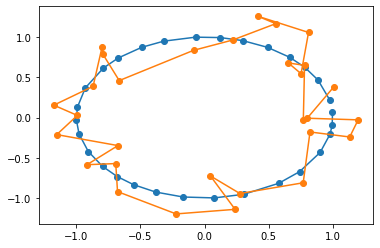

In [7]:
# data generation

import numpy as np
import random
import matplotlib.pyplot as plt

T = 30
x = np.zeros(T)
y = np.zeros((T,2))

for i in range(T):
    x[i] = x[i-1] + 2*np.pi/T + 0.05 * np.random.randn()
    y[i,:] = np.array([np.cos(x[i]), np.sin(x[i])]) + 0.2 * np.random.randn(2)

plt.plot(np.cos(x), np.sin(x), '-o')
plt.plot(y[:,0], y[:,1], '-o')

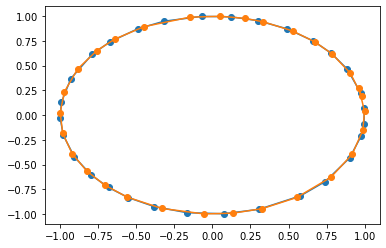

In [8]:
# particle filter

n = 1000

def simulate(X):  
    return X + 2*np.pi/T + 0.05 * np.random.randn(n)
    
def sample(X, y):
    prob = np.exp(-((y[0]-np.cos(X))**2+(y[1]-np.sin(X))**2)/(2*0.2**2))
    idx = random.choices(list(range(n)), k=n, weights=prob)
    return X[idx]

X = np.zeros(n)
mu = np.zeros(T)
sigma = np.zeros(T)
for i in range(T):
    X = simulate(X)
    X = sample(X, y[i,:])
    mu[i] = np.mean(X)
    sigma[i] = np.std(X)

plt.plot(np.cos(x), np.sin(x), '-o')
plt.plot(np.cos(mu), np.sin(mu),'-o')

<ErrorbarContainer object of 3 artists>

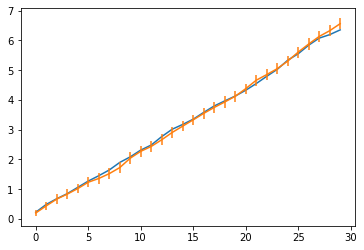

In [9]:
t = list(range(T))
plt.plot(t, x)
plt.errorbar(t, mu, yerr=2*sigma)